# Data Visualization

Data visualization is the visual presentation of data or information. The goal of data visualization is to communicate data or information clearly and effectively to readers. Typically, data is visualized in the form of a chart, infographic, diagram or map. 
The field of data visualization combines both art and data science. While a data visualization can be creative and pleasing to look at, it should also be functional in its visual communication of the data. 

# Objectives

Perform exploratory Data Analysis and Feature Engineering using Pandas and Matplotlib
- Data Visualization
- Exploratory Data Analysis

![spaceX data](https://www.teslarati.com/wp-content/uploads/2020/04/Falcon-Heavy-Demo-Feb-2018-SpaceX-1-crop-2048x956.jpg)

# Import Necessary Libraries.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get and Read Csv File

In [2]:
spacex = pd.read_csv("../Data/dataset_part_2.csv")

In [3]:
spacex.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


**From the data you can clearly see that the class is out Feature to Predict.**

*We have some points to check*
- Check Success Rate for each Launchsite
- Check the total number of launches for each Launchsite.
- Impact of PayloadMass on Launch Outcome.
- No of success rate in each orbit

# Check Scatterplot between FlightNumber and Payload

Text(0.5, 1.0, 'FlightNumber Vs PayloadMass')

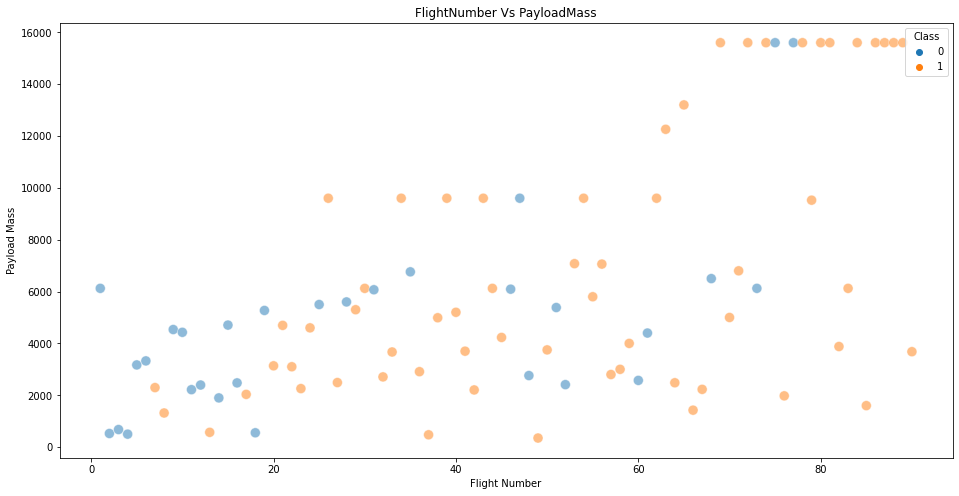

In [21]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='FlightNumber', y='PayloadMass', data=spacex, hue='Class',s=100,alpha=0.5)
plt.xlabel("Flight Number")
plt.ylabel("Payload Mass")
plt.title("FlightNumber Vs PayloadMass")

# Visualize the relationship between Flight Number and Launch Site.

Text(0.5, 1.0, 'FlightNumber Vs LaunchSite')

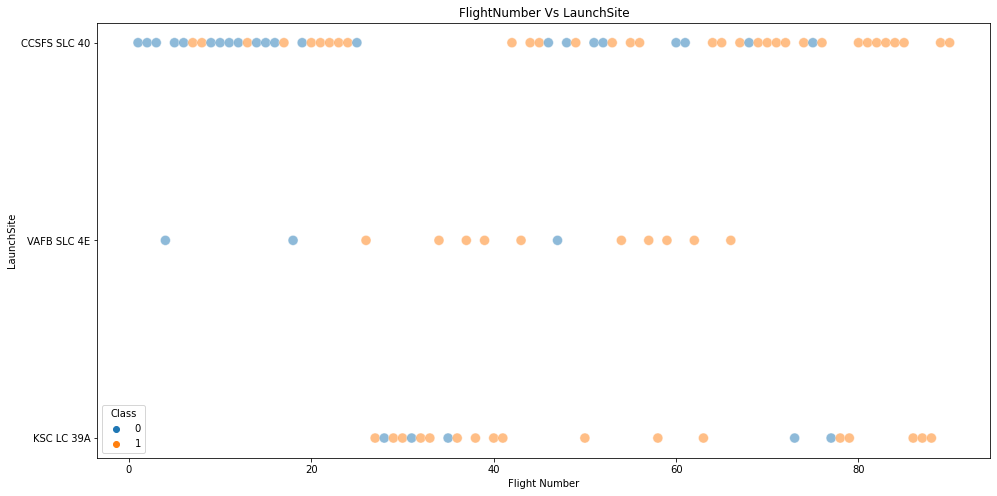

In [22]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='FlightNumber', y='LaunchSite', data=spacex, hue='Class',s=100,alpha=0.5)
plt.xlabel("Flight Number")
plt.ylabel("LaunchSite")
plt.title("FlightNumber Vs LaunchSite")

# Visualize the relationship between Payload and Launch Site.

Text(0.5, 1.0, 'PayloadMass Vs LaunchSite')

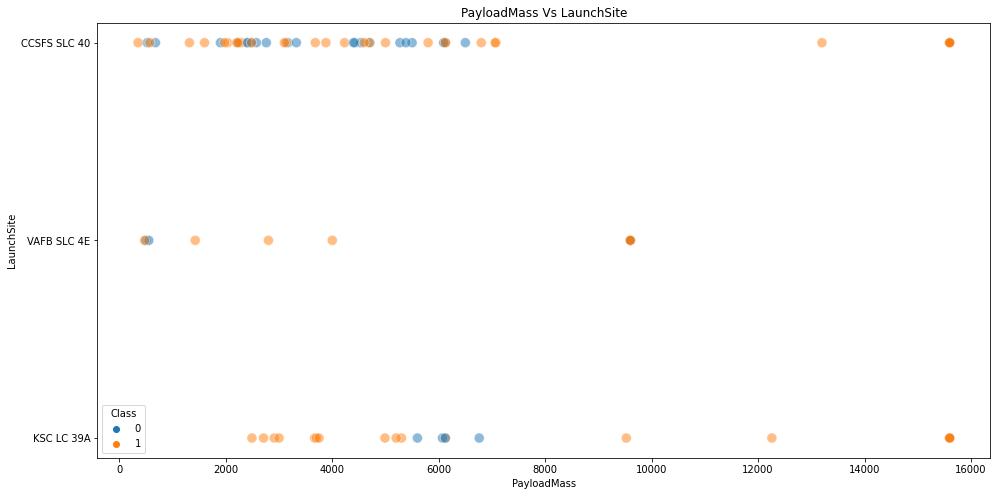

In [23]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='PayloadMass', y='LaunchSite', data=spacex, hue='Class',s=100,alpha=0.5)
plt.xlabel("PayloadMass")
plt.ylabel("LaunchSite")
plt.title("PayloadMass Vs LaunchSite")

# Visualize the relationship between success rate of each orbit type.

In [54]:
success_rate = list(spacex.groupby('Orbit')['Class'].sum()/spacex.groupby('Orbit')['Class'].count()*100)
orbit = list(spacex['Orbit'].unique())

Text(0.5, 1.0, 'OrbitType Vs Success Rate')

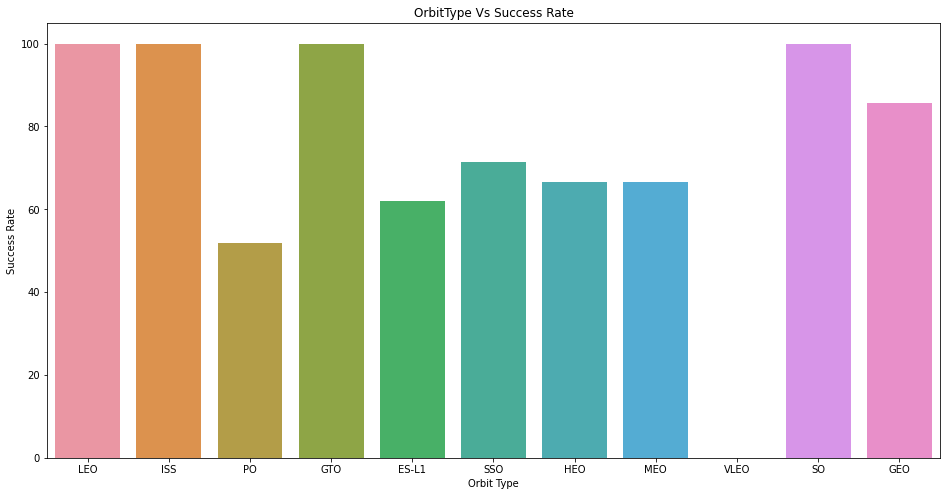

In [56]:
plt.figure(figsize=(16,8))
sns.barplot(x=orbit, y=success_rate)
plt.xlabel("Orbit Type")
plt.ylabel("Success Rate")
plt.title("OrbitType Vs Success Rate")

# Visualize the relationship between FlightNumber and Orbit type.

Text(0.5, 1.0, 'FlightNumber Vs Orbit')

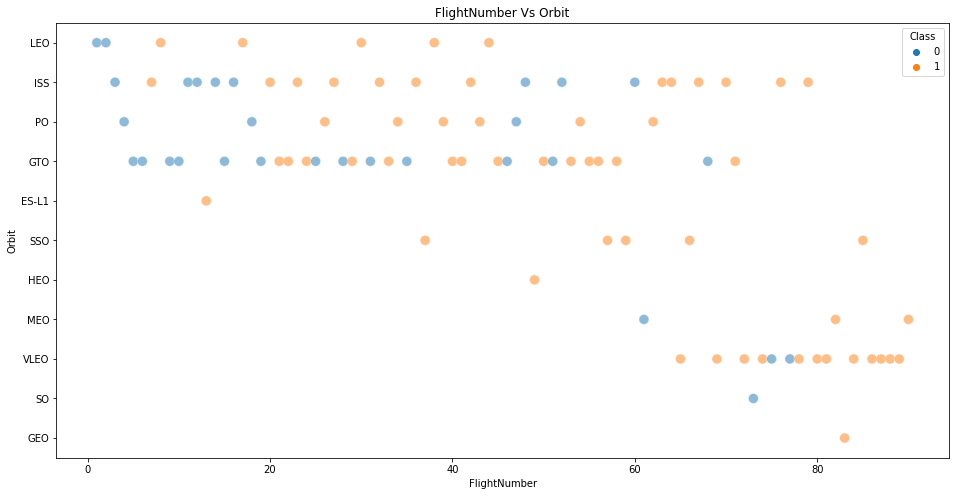

In [57]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='FlightNumber', y='Orbit', data=spacex, hue='Class',s=100,alpha=0.5)
plt.xlabel("FlightNumber")
plt.ylabel("Orbit")
plt.title("FlightNumber Vs Orbit")

# Visualize the relationship between Payload and Orbit type.

Text(0.5, 1.0, 'PayloadMass Vs Orbit')

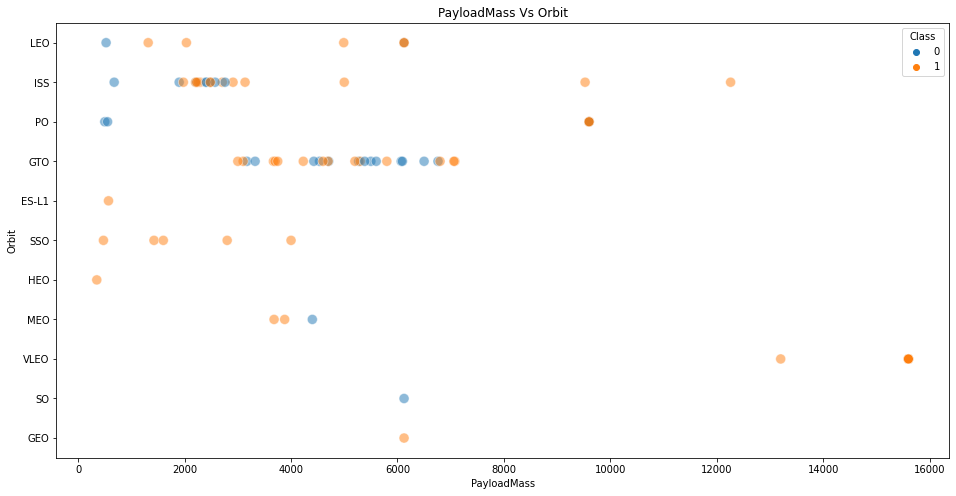

In [58]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='PayloadMass', y='Orbit', data=spacex, hue='Class',s=100,alpha=0.5)
plt.xlabel("PayloadMass")
plt.ylabel("Orbit")
plt.title("PayloadMass Vs Orbit")

# Visualize the launch success yearly trend.

The Date Column is of **object** Type need to Convert it into DateTime and Then Find the Year.

In [60]:
spacex['Date'] = pd.to_datetime(spacex['Date'])

Draw the Yearly Success Trend.

In [73]:
spacex['Date'].dt.year

0     2010
1     2012
2     2013
3     2013
4     2013
      ... 
85    2020
86    2020
87    2020
88    2020
89    2020
Name: Date, Length: 90, dtype: int64

Text(0.5, 1.0, 'Year Vs Success Rate')

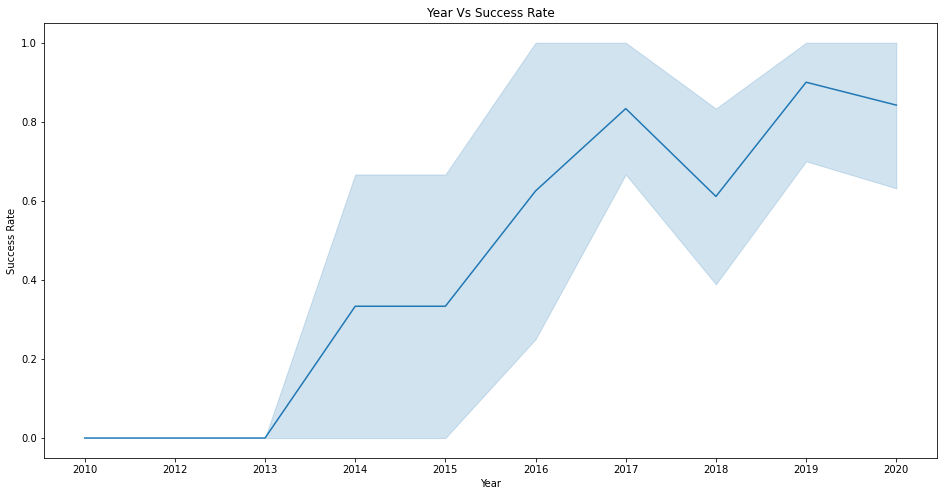

In [74]:
plt.figure(figsize=(16,8))
sns.lineplot(x=[str(year) for year in spacex['Date'].dt.year], y=spacex.groupby('Date')['Class'].mean(), data=spacex)
plt.xlabel("Year")
plt.ylabel("Success Rate")
plt.title("Year Vs Success Rate")

# End